**Yixuan Qiu**

Spring 2020

CS 251: Data Analysis and Visualization

Project 2: Matrix Transformations

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import data
import transformation

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 2: Matrix Transformations

The goal of this project is to give you practice using matrix multiplication to efficiently transform data (translation, scaling, and rotation). To that end, you'll develop the Transformation class as a child class of Analysis, from Project 1. 

We expect you to create the transformation matrices and and apply them from data using matrix multiplication yourself — **you may not call high-level functions to do all the work for you**. Functions similar to the following are fine to use:

- creating an identity matrix with `np.eye()`
- creating matrices of zeros or ones with `np.zeros()` or `np.ones()`
- concatenating matrices with `np.hstack()` or `np.vstack()`

Here is a **suggested order of implementation** for completing the Transformation class's methods in transformation.py:
1. `__init__()`: The constructor.
1. `get_data_homogeneous()`: Adds a column of normal homogeneous coordinates to the data matrix.
2. `project()`: Projects the M-dimensional Data object in self.data onto a subset of its axes.
3. Construct homogeneous transformation matrices (in any order):
> * `translation_matrix()`: Constructs an M+1-by-M+1 translation matrix for shifting the M-dimensional Data object in self.data
> * `scale_matrix()`: Constructs an M+1-by-M+1 scale matrix for resizing the M-dimensional Data object in self.data
> * `rotation_matrix_3d()`: Constructs a 4x4 rotation matrix for rotating the 3-dimensional Data object in self.data
4. Apply transformation matrices to the Data object in self.data (with homogeneous coordinates):
> * `translate()`: Uses a translation matrix to transform self.data
> * `scale()`: Uses a scale matrix to transform self.data
> * `rotate_3d()`: Uses a 3D rotation matrix to transform self.data (which must, in this case, contain exactly 3 features, plus the normal homogeneous coordinate)
> * `transform()`: Uses a homogeneous transformation matrix (passed as a parameter) to transform self.data.
5. Normalization:
> * `normalize_together()`: Uses homogeneous transformation matrices to normalize all the features of self.data together, using the global min and max.
> * `normalize_separately()`: Uses homogeneous transformation matrices to normalize each feaure separately, using its own local min and max.
6. Visualization:
> * `scatter_color()`: Similar to Analysis.scatter(), but using a third feature to control the color of the plotted data points.
> * `heatmap()`: This function is provided for you, already completed. Take a look to see what it's doing.

Use this notebook to demo your completed Transformation class (transformation.py).

## Task 0) Preprocess Iris data

- Copy over `data.py`, `analysis.py`, and `iris.csv` from Project 1.
- In whatever way you wish, replace the `species` strings with ints — i.e. setosa -> 0, versicolor -> 1, virginica -> 2. *Remember to change the type to numeric!*

## Task 1) Implement transformation matrices

Implement the following methods in `transformation.py`, running the following test code to guide you as you work. 
- Constructor
- `project(headers)`: "project" the data on the list of data variables specified by `headers` — i.e. select a subset of the variables from the original dataset.
- `get_data_homogeneous`: Helper method to get a version of the projected data array with an added homogeneous coordinate.
- `translation_matrix(headers, magnitudes)`: Make an M-dimensional homogeneous transformation matrix for translation
- `scale_matrix(headers, magnitudes)`: Make an M-dimensional homogeneous scaling matrix for scaling.
- `rotation_matrix_3d(header, degrees)`: Make an 3-D homogeneous rotation matrix for rotating the projected data about the ONE axis/variable `header`.
- `transform(C)`: Transforms the PROJECTED dataset by applying the homogeneous transformation matrix `C`.

### Test (i): Translation

- Write a test that does the following. Note the below expected output

* Create Data and Transformation objects for the Iris dataset. 
* Project the Transformation object's data onto the first 3 axes (`sepal_length`, `sepal_width`, and `petal_length`).
* Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`, then print the translation matrix. 

In [3]:
# Write your translation test here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'sepal_width', 'petal_length'])
print(iris_trans.translation_matrix(['sepal_length', 'petal_length'], [-0.5, 1.5]))

[[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   1.5]
 [ 0.   0.   0.   1. ]]


**Your output should look like:**

    Translation matrix:
    [[ 1.   0.   0.  -0.5]
     [ 0.   1.   0.   0. ]
     [ 0.   0.   1.   1.5]
     [ 0.   0.   0.   1. ]]

### Test (ii): Scaling

* Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`, then print the scaling matrix.

In [4]:
# Write your scale test here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'sepal_width', 'petal_length'])
print(iris_trans.scale_matrix(['sepal_width', 'petal_length'], [2, 1/3]))

[[1.      0.      0.      0.     ]
 [0.      2.      0.      0.     ]
 [0.      0.      0.33333 0.     ]
 [0.      0.      0.      1.     ]]


**Your output should look like:**

    Scale matrix:
    [[1.      0.      0.      0.     ]
     [0.      2.      0.      0.     ]
     [0.      0.      0.33333 0.     ]
     [0.      0.      0.      1.     ]]

### Test (iii): Rotation

* Create a rotatation matrix that would rotate the Transformation object's projected data by 45 degrees about `petal_length`, and print the rotation matrix.

In [5]:
# Write your rotation test here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'sepal_width', 'petal_length'])
print(iris_trans.rotation_matrix_3d('petal_length', 45))

[[ 0.70711 -0.70711  0.       0.     ]
 [ 0.70711  0.70711  0.       0.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


**Your output should look like:**

    Rotation matrix:
    [[ 0.70711 -0.70711  0.       0.     ]
     [ 0.70711  0.70711  0.       0.     ]
     [ 0.       0.       1.       0.     ]
     [ 0.       0.       0.       1.     ]]

### Test (iv): Perform the compound rotation-translation-scaling transformation to the projected data

- Create a compound transformation matrix in the cell below that applies the above rotation, translation, and scaling.
- Use the `transform` method to apply it to the projected data. Print the 1st 5 samples.

In [6]:
# Write your compound RTS transformation test here

# Create a compound transformation matrix in the cell below 
# that applies the above rotation, translation, and scaling (in that order). 
# Remember the data matrix will ultimately go on the right-hand side.

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'sepal_width', 'petal_length'])
rot_mat = iris_trans.rotation_matrix_3d('petal_length', 45)
trans_mat = iris_trans.translation_matrix(['sepal_length', 'petal_length'], [-0.5, 1.5])
scale_mat = iris_trans.scale_matrix(['sepal_width', 'petal_length'], [2, 1/3])
C = scale_mat@trans_mat@rot_mat
print('My compound transformation matrix:\n', C)
print('\n My transformed data:\n', iris_trans.transform(C)[:5])

My compound transformation matrix:
 [[ 0.70711 -0.70711  0.      -0.5    ]
 [ 1.41421  1.41421  0.       0.     ]
 [ 0.       0.       0.33333  0.5    ]
 [ 0.       0.       0.       1.     ]]

 My transformed data:
 [[ 0.63137 12.16224  0.96667  1.     ]
 [ 0.8435  11.17229  0.96667  1.     ]
 [ 0.56066 11.17229  0.93333  1.     ]
 [ 0.56066 10.88944  1.       1.     ]
 [ 0.48995 12.16224  0.96667  1.     ]]


    Compound transformation matrix:
    [[ 0.70711 -0.70711  0.      -0.5    ]
     [ 1.41421  1.41421  0.       0.     ]
     [ 0.       0.       0.33333  0.5    ]
     [ 0.       0.       0.       1.     ]]
     
    Transformed data:
    [[ 0.63137 12.16224  0.96667  1.     ]
     [ 0.8435  11.17229  0.96667  1.     ]
     [ 0.56066 11.17229  0.93333  1.     ]
     [ 0.56066 10.88944  1.       1.     ]
     [ 0.48995 12.16224  0.96667  1.     ]]

## Task 2) Transformation detective

The objective of this task is to determine the set of matrix transformations to apply to the specified data and what variables to project onto in order to reproduce the below plots.

### 2a) Hello, Iris

- Create Data and Transformation objects for the Iris dataset.
- Project the dataset onto all the headers.
- Use the Transfromation object to generate a pair plot of the entire Iris dataset. (*Your results should look just like the example, below.*)

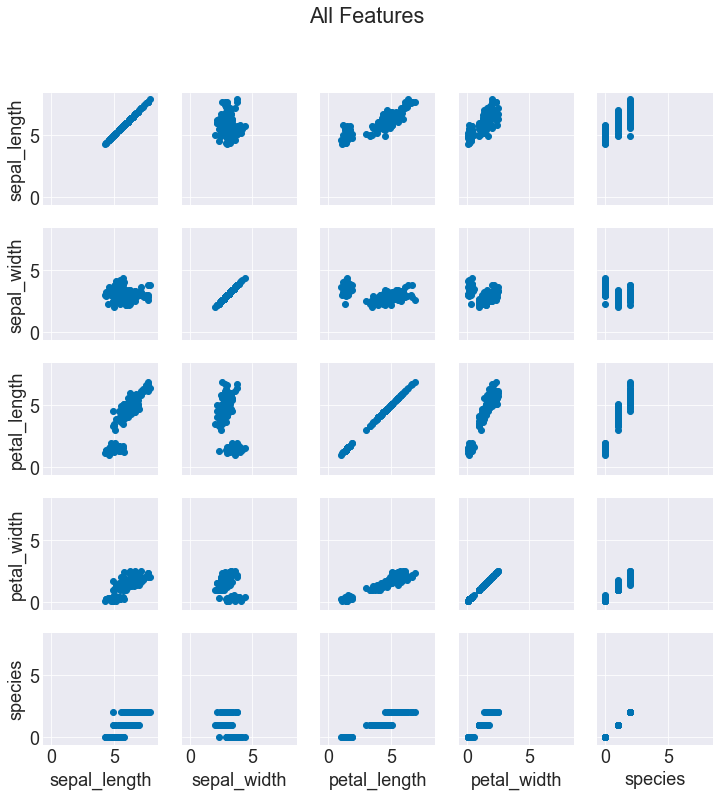

In [7]:
# Write your 2a code here

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(iris_data.get_headers_2())
iris_trans.pair_plot(iris_data.get_headers_2(), title='All Features')
iris_trans.show()

#### Your results should look like the image below.
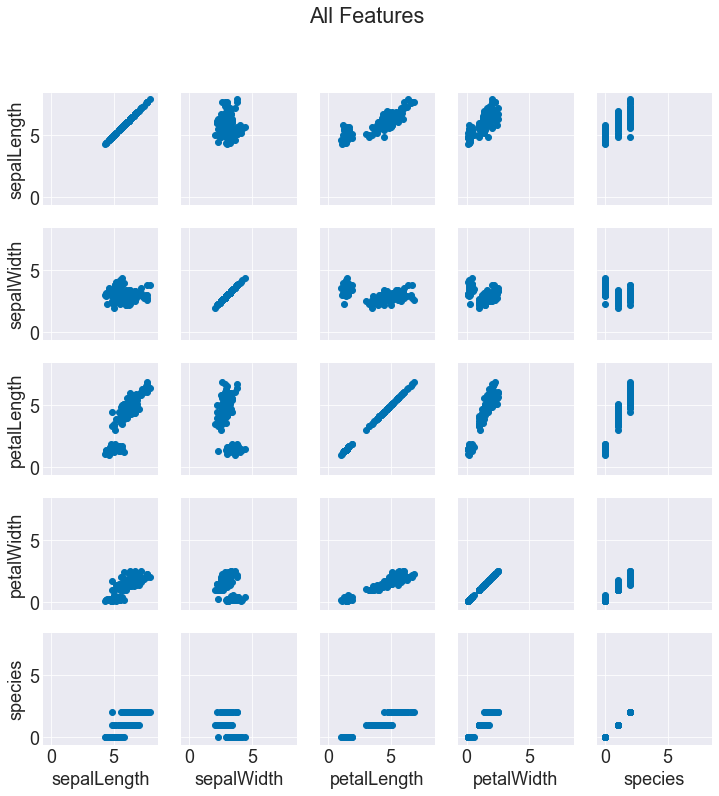

**Question 1:** How many dimensions (features) does the Iris dataset contain?

**Answer 1:** *5*

### 2b) Solve transformation mystery 1

- Make a Transformation object.
- Determine the set of variables to project onto to recreate the image below.
- Create a pair plot identical to the one below based on the projected data.

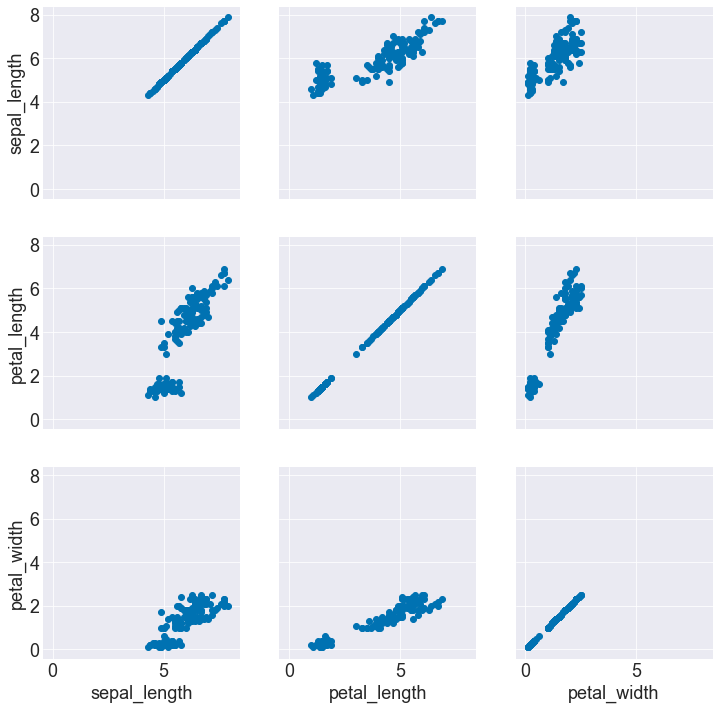

In [8]:
# Write your 2b code here

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'petal_length', 'petal_width'])
iris_trans.pair_plot(['sepal_length', 'petal_length', 'petal_width'])
iris_trans.show()

#### Your results should look like the image below.
Your results should look like those below.
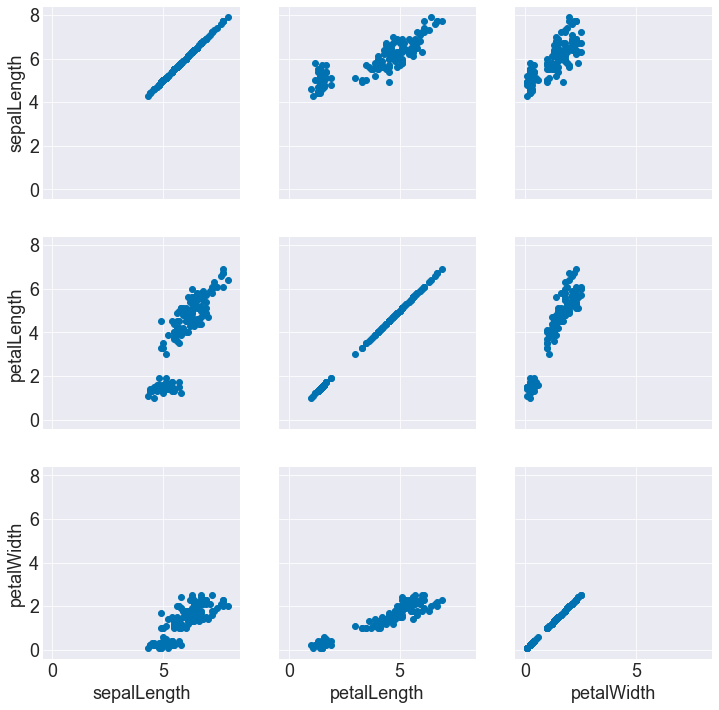

**Question 2:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 2:** *Independent variables are sepal_length, petal_length, and petal_width. Dependent variables are also sepal_length, petal_length, and petal_width. These are the data variables to be passed in as an argument to pair_plot().*

### 2c) Implement methods that apply a single transformation

Although you already have a method implemented to apply a compound transformation, it can be convenient to have dedicated methods to apply a single transformation to projected data (without having to pass around matrices). Implement the following methods for this purpose:
- `translate`: Translates the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `scale`: Scales the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `rotate_3d`: Rotates the projected data about the variable `header` by the angle (in degrees) `degrees`

#### Test `translate`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Translate x, y, and z by +1 unit each.
- Print out the 1st 5 samples of the result.

In [9]:
# Write your translate test code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'sepal_width', 'petal_length'])
translated_data = iris_trans.translate(['sepal_length', 'sepal_width', 'petal_length'], [1, 1, 1])
print(translated_data[:5])

[[6.1 4.5 2.4]
 [5.9 4.  2.4]
 [5.7 4.2 2.3]
 [5.6 4.1 2.5]
 [6.  4.6 2.4]]


**Your translate output should look like:**

    [[6.1 4.5 2.4]
     [5.9 4.  2.4]
     [5.7 4.2 2.3]
     [5.6 4.1 2.5]
     [6.  4.6 2.4]]

#### Test `scale`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Scale x, y, and z to 50% each.
- Print out the 1st 5 samples of the result.

In [10]:
# Write your scale test code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'sepal_width', 'petal_length'])
scaled_data = iris_trans.scale(['sepal_length', 'sepal_width', 'petal_length'], [0.5, 0.5, 0.5])
print(scaled_data[:5])

[[2.55 1.75 0.7 ]
 [2.45 1.5  0.7 ]
 [2.35 1.6  0.65]
 [2.3  1.55 0.75]
 [2.5  1.8  0.7 ]]


**Your scale output should look like:**

    [[2.55 1.75 0.7 ]
     [2.45 1.5  0.7 ]
     [2.35 1.6  0.65]
     [2.3  1.55 0.75]
     [2.5  1.8  0.7 ]]

#### Test `rotate_3d`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Rotate about `sepal_length` 10 deg.
- Print out the 1st 5 samples of the result.

In [11]:
# Write your rotate 3d test code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'sepal_width', 'petal_length'])
rotated_data = iris_trans.rotate_3d('sepal_length', 10)
print(rotated_data[:5])

[[5.1     3.20372 1.9865 ]
 [4.9     2.71132 1.89968]
 [4.7     2.92564 1.83592]
 [4.6     2.79243 2.01552]
 [5.      3.3022  2.00386]]


**Your rotation output should look like:**

    [[5.1     3.20372 1.9865 ]
     [4.9     2.71132 1.89968]
     [4.7     2.92564 1.83592]
     [4.6     2.79243 2.01552]
     [5.      3.3022  2.00386]]

### 2d) Solve transformation mystery 2

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data.

**NOTE:** Remember that `Transformation` inherits from `Analysis` so you have access to all those methods.

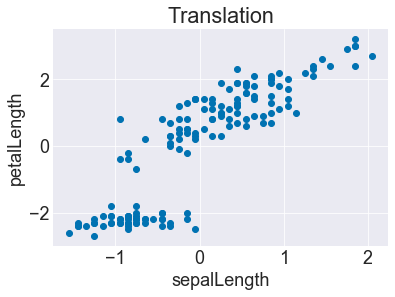

In [12]:
# Write your 2d code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'petal_length'])
iris_trans.translate(['sepal_length', 'petal_length'], [-5.85, -3.7])
iris_trans.scatter('sepal_length', 'petal_length', 'Translation')
plt.xlabel('sepalLength')
plt.ylabel('petalLength')
iris_trans.show()

#### Your results should look like the image below.
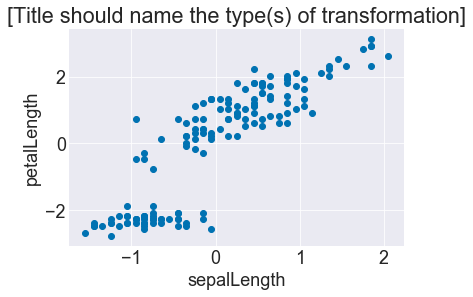

**Question 3:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 3:** * Plot the original data first and compare it with the given graph. The distributions of the points in the 2 plots are identical. The difference is the axes. Find a point on the given graph and compare its coordinates with that of the same point on the original graph to calculate the amount of translation. A translation matrix shifts the projected data by -5.85 along sepal_length and -3.7 along petal_length*

### 2e) Solve transformation mystery 3

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data. 

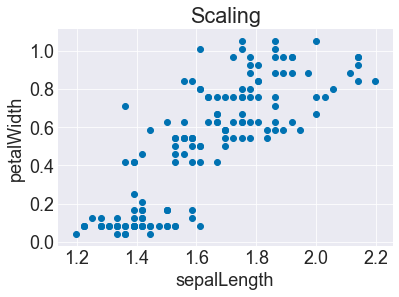

In [13]:
# Write your 2e code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'petal_width'])
iris_trans.scale(['sepal_length', 'petal_width'], [0.278, 0.42])
iris_trans.scatter('sepal_length', 'petal_width', 'Scaling')
plt.xlabel('sepalLength')
plt.ylabel('petalWidth')
iris_trans.show()

#### Your results should look like the plot below.
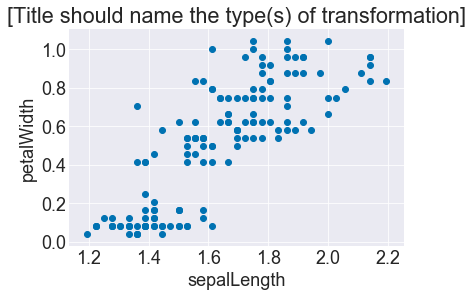

**Question 4:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 4:** *I first used xlim and ylim to make the range of x and y axes the same as the sample plot. But I found that only part of the scatter plot was shown, which means the data is scaled down. And then I divided the position of a certain point on the given plot by the position of the same point on the original plot to find the scaling factors. I scaled the projected data by 0.278 along sepal_length and by 0.42 along petal_width.*

### 2f) Solve transformation mystery 4

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a pair plot identical to the one below based on the projected/transformed data. 

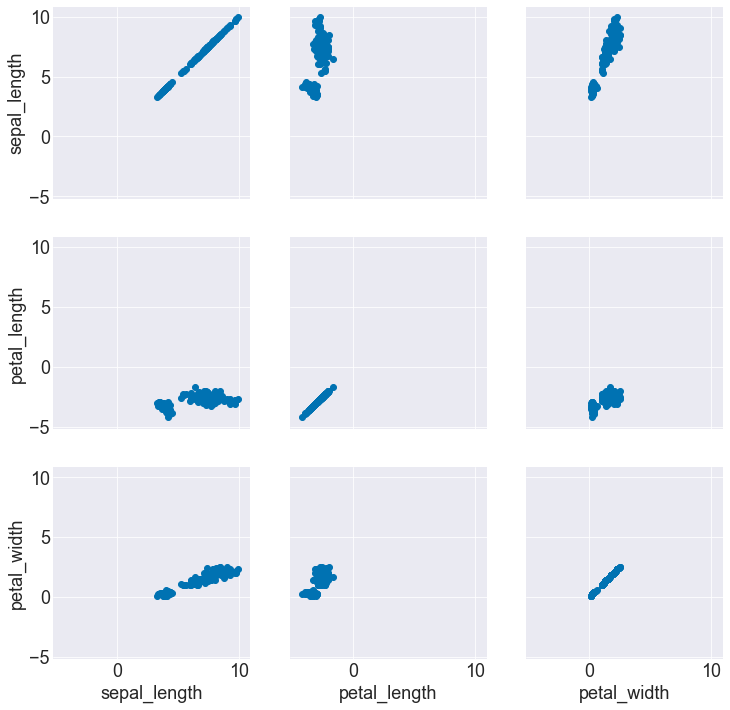

In [14]:
# Write your 2f code here

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'petal_length', 'petal_width'])
iris_trans.rotate_3d('petal_width', -57)
iris_trans.pair_plot(['sepal_length', 'petal_length', 'petal_width'])
iris_trans.show()

#### Your results should look like the image below.
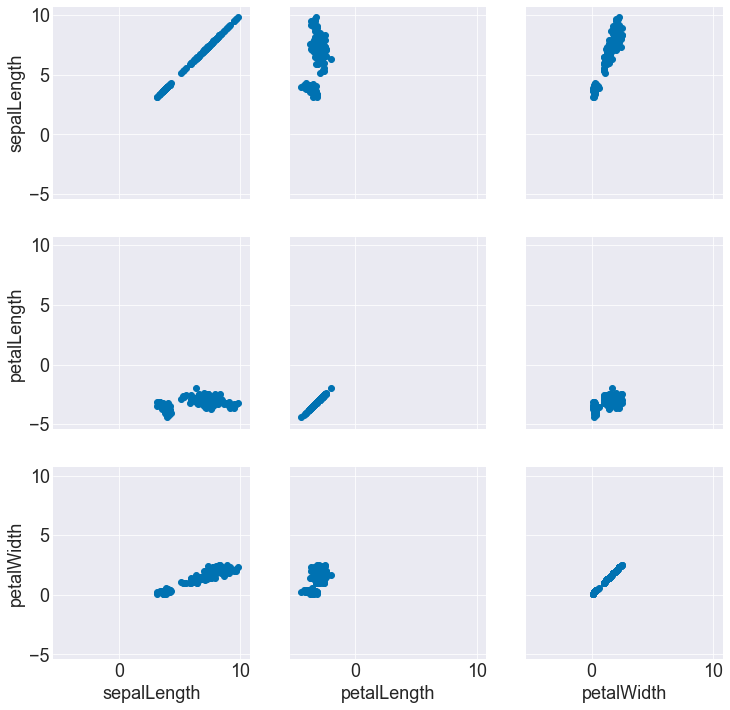

**Question 5:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 5:** *The given plots' data shapes are very different from my original plots. Simply translation and scaling would not affect the shape. So I guessed the transformation would involve rotations. And then I tried many degrees to find out the correct one.*

## Task 3) Normalization

In this task, you will take advantage of your data transformation pipeline to normalize data in two ways:
1. All the variables together (entire matrix).
2. All the variables separately/independently.

Implement the following methods to perform each of these operations:
- `normalize_together`: 
- `normalize_separately`: 

### 3a ) Normalize together

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __together__.
- Create a pair plot identical to the one below based on the projected/transformed data. 


Normalize together using vectorization
time elapsed:  0.00014591217041015625


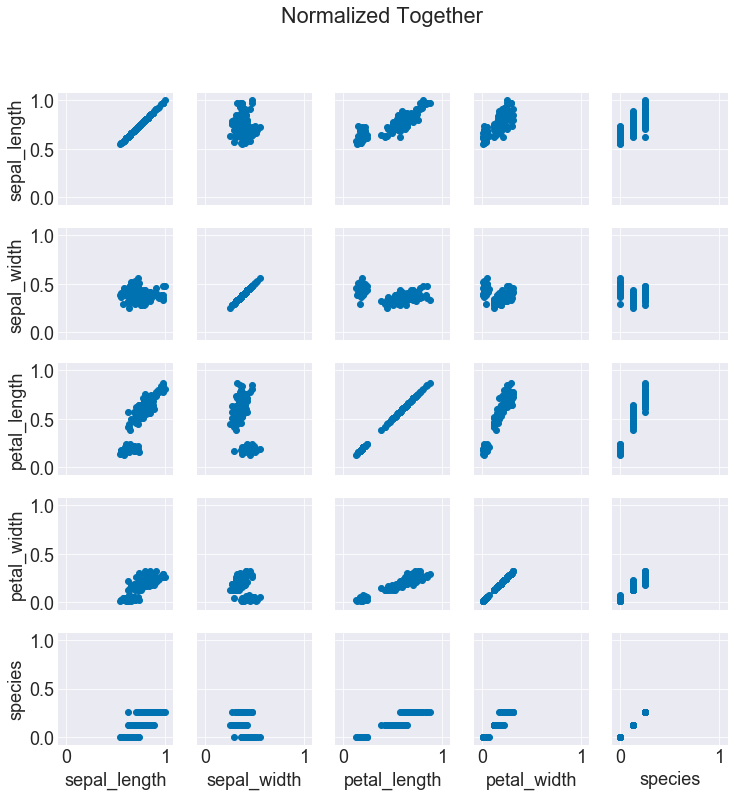

In [15]:
# Write your 3a code here

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(iris_data.get_headers_2())
iris_trans.normalize_together()
iris_trans.pair_plot(iris_data.get_headers_2(), title='Normalized Together')
iris_trans.show()

#### Your results should look like the image below.
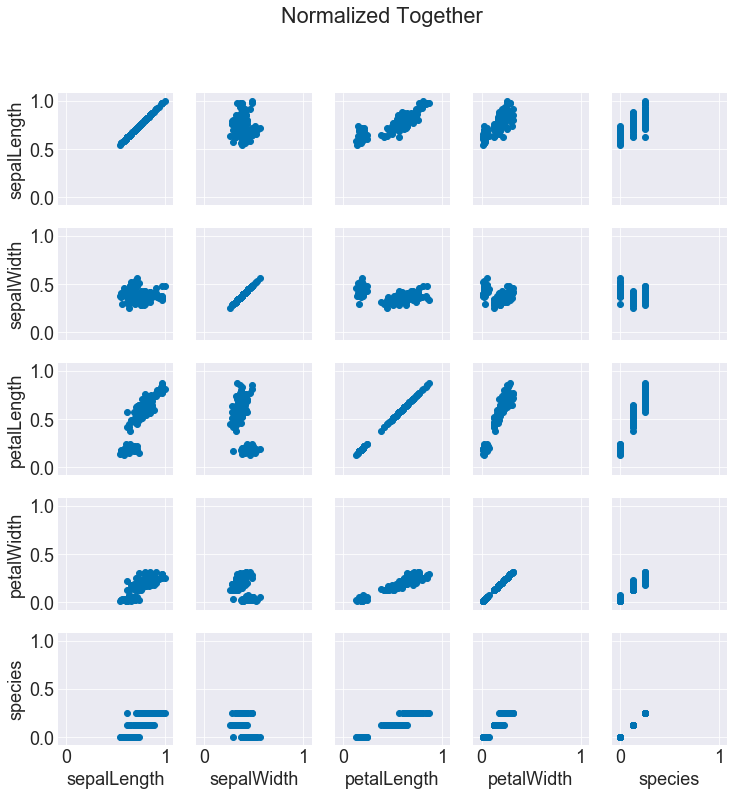

### 3b) Normalize Separately
- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __separately__.
- Create a pair plot identical to the one below based on the projected/transformed data. 


Normalize separately
time elapsed:  0.0005068778991699219


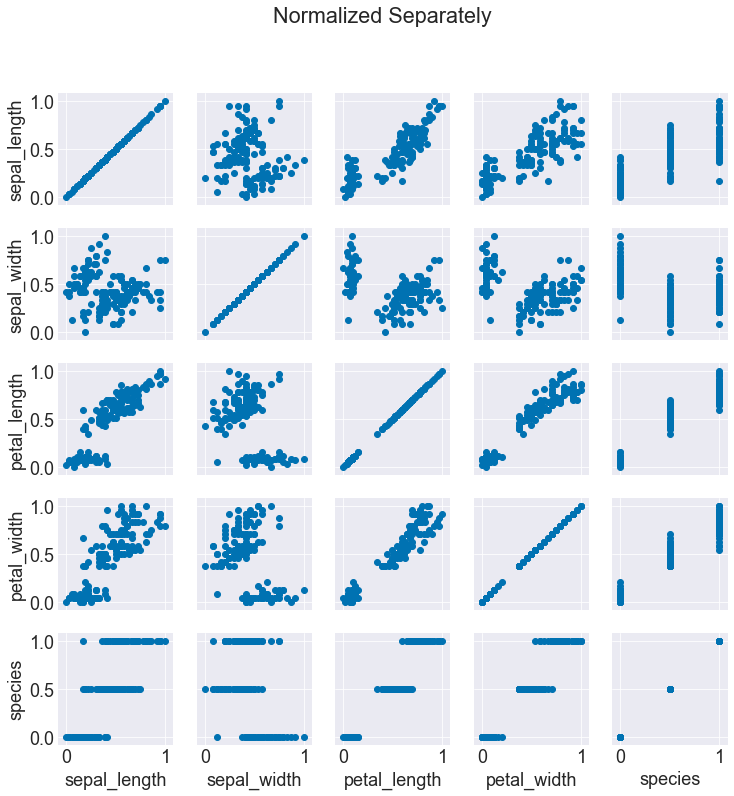

In [16]:
# Write your 3b code here

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(iris_data.get_headers_2())
iris_trans.normalize_separately()
iris_trans.pair_plot(iris_data.get_headers_2(), title='Normalized Separately')
iris_trans.show()

Your results should look like the image below.
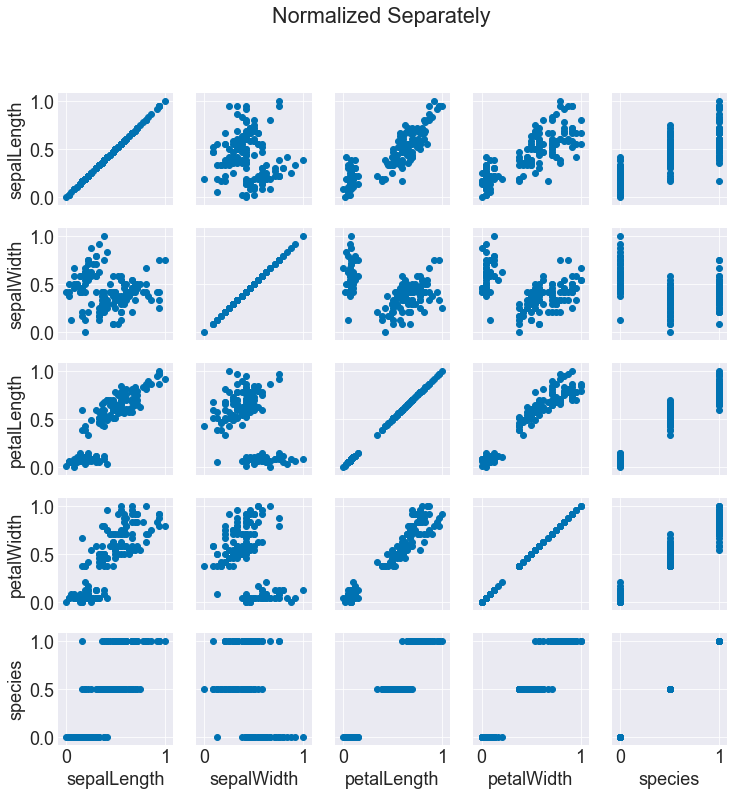

**Question 6:** What type(s) of transformation does normalization require?

**Answer 6:** *Translation by -min and then scaling by 1/range*

### 3c) Analysis challenge

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Determine the set of transformations to apply to them.
- Create a pair plot identical to the one below based on the projected/transformed data. 


Normalize separately
time elapsed:  0.0002009868621826172


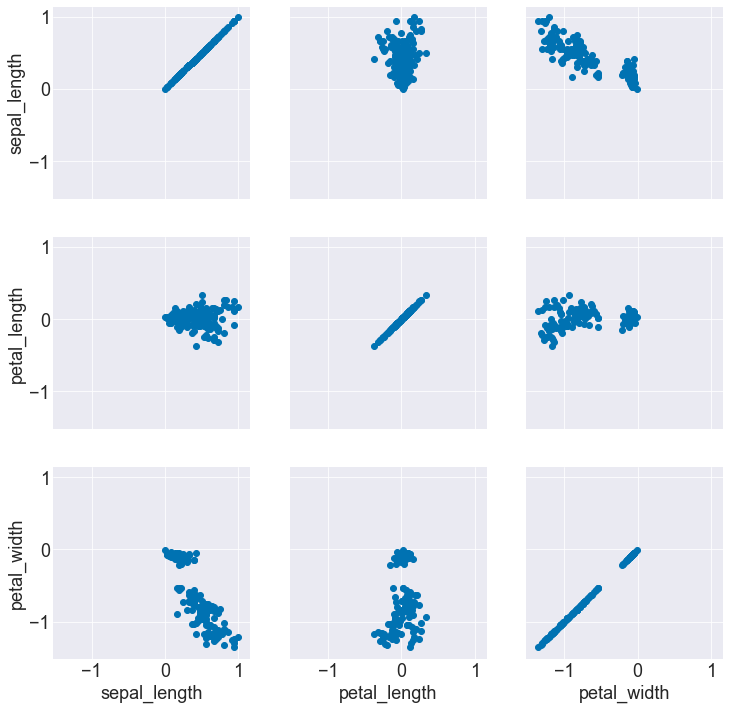

In [17]:
# Write your 3c code here

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'petal_length', 'petal_width'])

iris_trans.normalize_separately()
iris_trans.rotate_3d('sepal_length', 45)
iris_trans.scale(['petal_width', 'petal_length'], [-1, 2])

fig, axes = iris_trans.pair_plot(['sepal_length', 'petal_length', 'petal_width'])
iris_trans.show()

Your results should look like the image below.
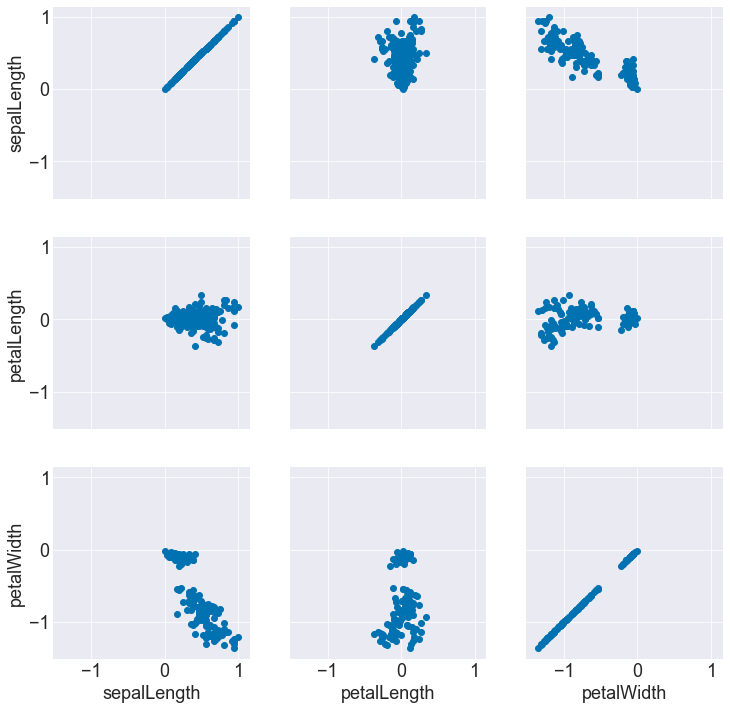

## Task 4) Visualizing multi-dimensional data (>3D)

The Iris dataset has too many dimensions to visualize in 2D space with a standard scatterplot! Let's see what we can do about that.

### 4a) Color scales

In this subtask, you will use color to visualize a third dimension of the Iris dataset. Your color scale should be colorblind friendly.

- Implement the `scatter_color()` method to your `Transformation` class that uses color to represent a third axis on a 2D scatterplot.
    - **Section B (Linear Algebra):** Use a ColorBrewer color palette to implement the color scale (e.g. from the `palettable` library).
- Use your `scatter_color()` method to recreate the images below.
    * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
    * Another with headers [`sepal_length`, `petal_length`, `species`].

**Reminder:** Re-project your data onto the appropriate variables before plotting.

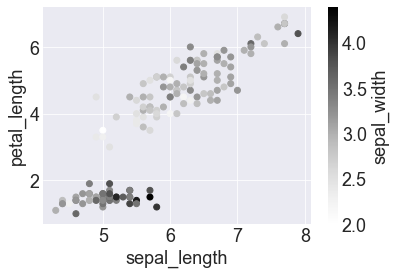

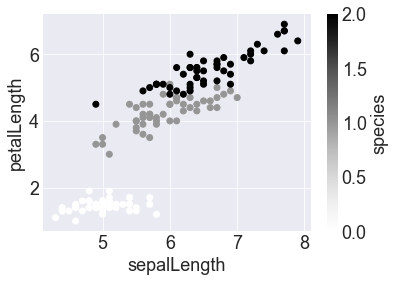

In [18]:
# Write your 4a code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'petal_length', 'sepal_width'])
iris_trans.scatter_color('sepal_length', 'petal_length', 'sepal_width')
iris_trans.project(['sepal_length', 'petal_length', 'species'])
iris_trans.scatter_color('sepal_length', 'petal_length', 'species')
plt.xlabel('sepalLength')
plt.ylabel('petalLength')
iris_trans.show()

#### Your results should look like the following
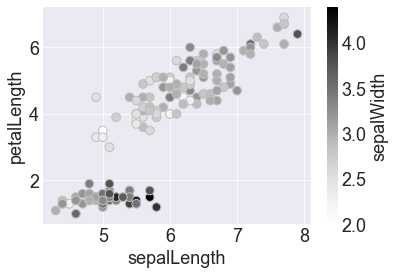
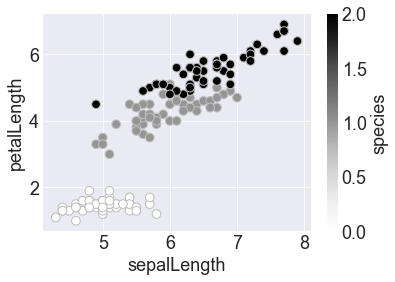

**Question 7:** In a scatterplot, is color a more useful representation of __continuous__ features (like sepal width) or __discrete__ features (like species)? Why do you think that is?

**Answer 7:** *Color in the first plot is continuous, because the numeric values of sepal width are continuous, corresponding to continuous color. Also, the ordering in the legend is sequential. Color in the second plot is discrete, because the values of species are 0, 1, 2, and they are mapped to 3 colors--white, grey, and black.*

### 4b) Heatmap

Use the a `heatmap()` method (written for you) to recreate the image below.


Normalize separately
time elapsed:  0.0003628730773925781


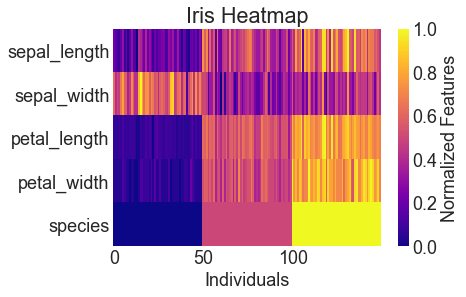

In [19]:
# Write your 4b code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(iris_data.get_headers_2())
iris_trans.heatmap(title='Iris Heatmap', cmap='plasma')
iris_trans.show()

#### Your results should look like the image below.
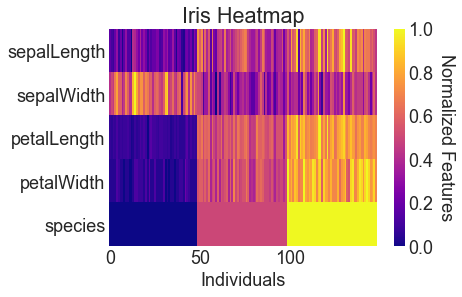

**Question 8:** Does color help you see any patterns in this heatmap that were difficult to see in the scatterplots?

**Question 9:** Are there any characteristics of iris.csv support the readability of this heatmap? Explain your answer.

**Answer 8:** *Color allows me to see local mins and maxes. 0s indicate mins, 1s indicate maxes. The pattern of colored stripes is also more informative. For example, it is easy to see that species are divided into three categories indicated by the three rectangles of different colors at the bottom.*

**Answer 9:** *They are sorted by species. Also, the precision of the data is relatively low. There is at most one digit after the decimal point, which makes it easier to tell apart similar colors.*

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Explore additional visualizations

- Implement a scatter plot version that uses the marker size aesthetic to visualize another dimension of data (up to 4D).
- Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

### Extension 1:
<font color='green'>For my first extension, I added a 4th dimension using marker size. I made a scatter_color_4d() method that takes in 4 headers of variables in my Transformation. In order to create a legend for size, I used a legend method which takes in handles and labels that are generated from calling legend_elements.\
    In the scatter plot below, x and y variables are sepal length and sepal width, sepal width is captured by a color scale, and sepal width corresponds to marker size.\
    Next, I implemented a 5-dimensional plot by drawing a 3D plot for the first three variables(x, y, and z). Color and marker size are another 2 scales. In my Transformation, I made a scatter_color_5d() method that takes in 5 headers of variables. I used a flatten() method to make color variables collapse into one dimension.

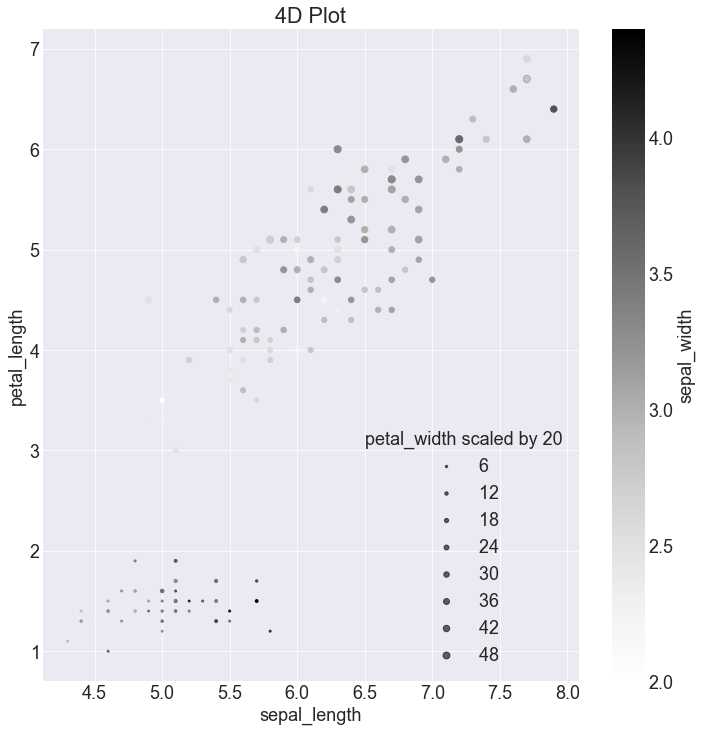

In [41]:
# Implement a scatter plot version 
# that uses the marker size aesthetic to visualize another dimension of data (up to 4D).

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'petal_length', 'sepal_width', 'petal_width'])
iris_trans.scatter_color_4d('sepal_length', 'petal_length', 'sepal_width', 'petal_width', title='4D Plot')
iris_trans.show()

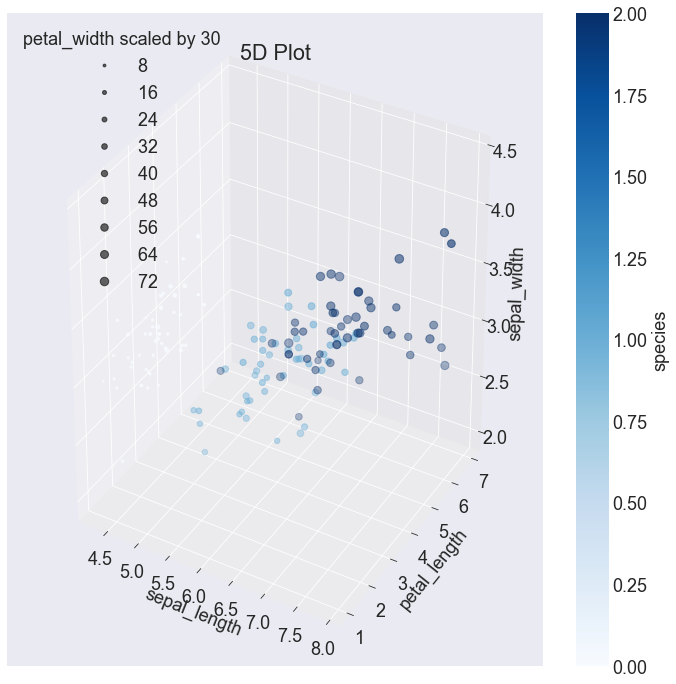

In [31]:
# Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'petal_length', 'sepal_width', 'species', 'petal_width'])
iris_trans.scatter_color_5d('sepal_length', 'petal_length', 'sepal_width', 'species', 'petal_width', title='5D Plot')
iris_trans.show()

### 2. Perform different matrix transformations on data

- Normalize by Z-score rather than min/max.
- "Whiten" a dataset.
- Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).

### Extension 2
#### 1) Normalize by Z-score rather than min/max.
    
<font color='green'>I created a method zscore() in Transformation that calculated mean and standard deviation for a dataset. Then I used vectorization to generate a matrix following the formula z = (x-μ)/σ, where x is the raw data, μ is the mean, and σ is the standard deviation.\
    I plotted iris data with the method, and the result looks different from normalizing by min/max.

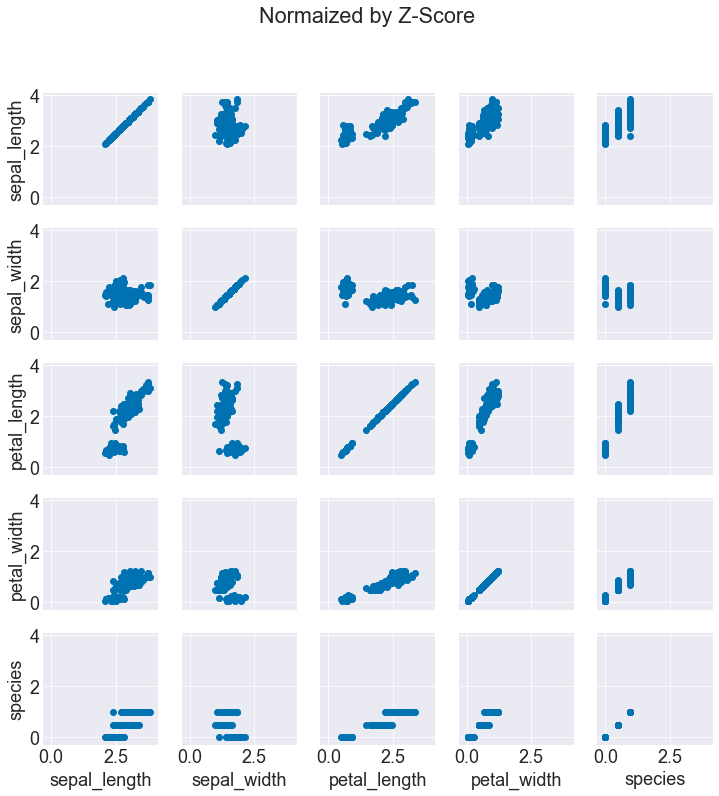

In [22]:
# 1) Normalize by Z-score.

iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(iris_data.get_headers_2())
iris_trans.zscore()
iris_trans.pair_plot(iris_data.get_headers_2(), title = 'Normalized by Z-Score')
iris_trans.show()

#### 2) Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).
    
<font color='green'>I originally used vectorization to implement my (), so I created a new method normalize_together_2() that uses transformation matrices.\
I also made a normalize_separately_2() method that uses vectorization.
    The main difference in implementation is that with vectorization, I did not need to use matrix multiplication to apply translation matrices and scaling matrices on the data. Instead, I could take advantage of numpy's arithmetic methods, which simplified my code a lot.
    
    
To compare the time-efficiency, I imported the time package, recorded starting and ending times, and calculated the elapsed time. 

In [23]:
# 2) Implement normalize together and separately using numpy vectorization/broadcasting. 
# Compare the approaches in efficiency (time and compare the two implementations).

# Separate: Without using vectorization
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(iris_data.get_headers_2())
iris_trans.normalize_separately()

# Separate: Using vectorization
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(iris_data.get_headers_2())
iris_trans.normalize_separately_2()

# Together: Without using vectorization 
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(iris_data.get_headers_2())
iris_trans.normalize_together_2()

# Together: Using vectorization
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(iris_data.get_headers_2())
iris_trans.normalize_together()


Normalize separately
time elapsed:  0.0003612041473388672

Normalize separately using vectorization
time elapsed:  0.00014209747314453125

Normalize together
time elapsed:  0.0005419254302978516

Normalize together using vectorization
time elapsed:  0.000102996826171875


array([[0.64557, 0.44304, 0.17722, 0.02532, 0.     ],
       [0.62025, 0.37975, 0.17722, 0.02532, 0.     ],
       [0.59494, 0.40506, 0.16456, 0.02532, 0.     ],
       [0.58228, 0.39241, 0.18987, 0.02532, 0.     ],
       [0.63291, 0.4557 , 0.17722, 0.02532, 0.     ],
       [0.68354, 0.49367, 0.21519, 0.05063, 0.     ],
       [0.58228, 0.43038, 0.17722, 0.03797, 0.     ],
       [0.63291, 0.43038, 0.18987, 0.02532, 0.     ],
       [0.55696, 0.36709, 0.17722, 0.02532, 0.     ],
       [0.62025, 0.39241, 0.18987, 0.01266, 0.     ],
       [0.68354, 0.46835, 0.18987, 0.02532, 0.     ],
       [0.60759, 0.43038, 0.20253, 0.02532, 0.     ],
       [0.60759, 0.37975, 0.17722, 0.01266, 0.     ],
       [0.5443 , 0.37975, 0.13924, 0.01266, 0.     ],
       [0.73418, 0.50633, 0.1519 , 0.02532, 0.     ],
       [0.72152, 0.55696, 0.18987, 0.05063, 0.     ],
       [0.68354, 0.49367, 0.16456, 0.05063, 0.     ],
       [0.64557, 0.44304, 0.17722, 0.03797, 0.     ],
       [0.72152, 0.48101, 0.

#### <font color='green'>The printed results are:
    
    Normalize separately
        time elapsed:  0.0003612041473388672

    Normalize separately using vectorization
        time elapsed:  0.00014209747314453125

    Normalize together
        time elapsed:  0.0005419254302978516

    Normalize together using vectorization
        time elapsed:  0.000102996826171875
    

<font color='green'>Using vectorization is faster than transforming matrices and performing matrix multiplication.

### 3. Implement and use 2D rotation

### Extension 3

<font color='green'>For this extension, I created another two methods--rotation_matrix_2d() and rotate_2d().
    
    rotation_matrix_2d takes in one argument--degrees--and generates 2x2 rotation matrix.
    
    rotate_2d transposes matrices and performs multiplication to rotate the projected data by some angle. The implementation is basically the same as rotate_3d. The difference is that we do not need to take care of homogenous coordinates.
    
To test my 2D rotation implementation, I projected only 2 dimensions of data.\
Firstly, I drew a scatter plot with the raw data.\
Next, I rotated the data by 45 degrees and drew another scatter plot.\
Lastly, I rotated the data by 360 degrees to test if I could get the original data back.

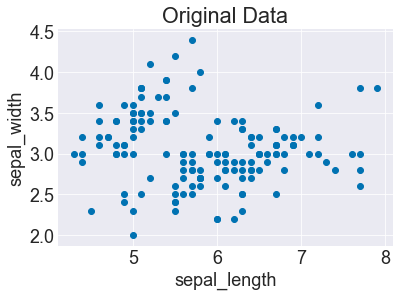

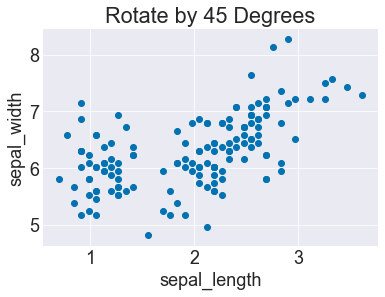

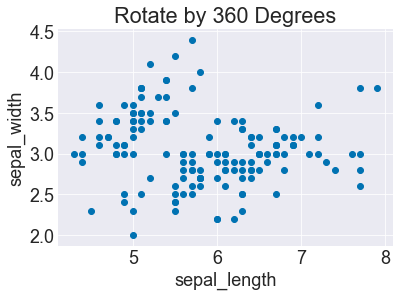

In [24]:
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
iris_trans.project(['sepal_length', 'sepal_width'])
iris_trans.scatter('sepal_length', 'sepal_width', 'Original Data')
iris_trans.show()

iris_trans.project(['sepal_length', 'sepal_width'])
iris_trans.rotate_2d(45)
iris_trans.scatter('sepal_length', 'sepal_width', 'Rotate by 45 Degrees')
iris_trans.show()

iris_trans.project(['sepal_length', 'sepal_width'])
iris_trans.rotate_2d(360)
iris_trans.scatter('sepal_length', 'sepal_width', 'Rotate by 360 Degrees')
iris_trans.show()

<font color='green'>Rotating by 360 degrees gives back the original data.

### 4. Apply matrix transformations and visualization a dataset of your choice

<font color='green'>For this extension, I applied matrix transformations and visualization to tips.csv.\
    
I first plot three features of the raw data--total bill, tip and size.

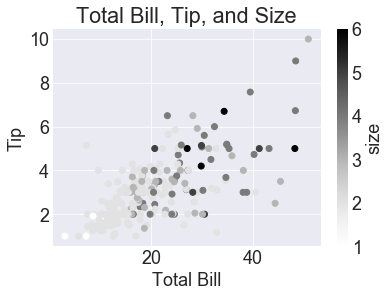

In [25]:
# Original data
tips_filename = 'data/tips.csv'
tips_data = data.Data(tips_filename)
tips_trans = transformation.Transformation(tips_data)
tips_trans.project(['total_bill', 'tip', 'size'])
tips_trans.scatter_color('total_bill', 'tip', 'size', 'Total Bill, Tip, and Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
tips_trans.show()

<font color='green'>Then I scaled the data by 0.2 along the total bill axis and 0.8 along the tip axis. The shape of the data did not change, but the ranges of axes changed.

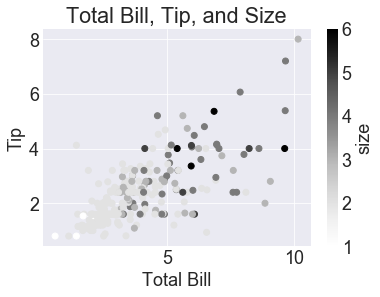

In [26]:
# Scaling
tips_trans.project(['total_bill', 'tip', 'size'])
tips_trans.scale(['total_bill', 'tip'], [0.2, 0.8])
tips_trans.scatter_color('total_bill', 'tip', 'size', 'Total Bill, Tip, and Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
tips_trans.show()

<font color='green'>Next, I rotated the data about the size axis by 30 degrees. The positive correlation between total bill and tip becomes clearer from the new angle.

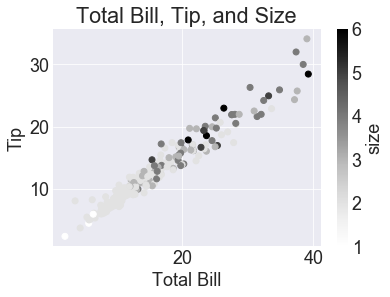

In [44]:
# Rotation
tips_trans.project(['total_bill', 'tip', 'size'])
tips_trans.rotate_3d('size', 30)
tips_trans.scatter_color('total_bill', 'tip', 'size', 'Total Bill, Tip, and Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
tips_trans.show()

<font color='green'>Lastly, I normalized the dataset separately to fit it in a unit square.


Normalize separately
time elapsed:  0.0003139972686767578


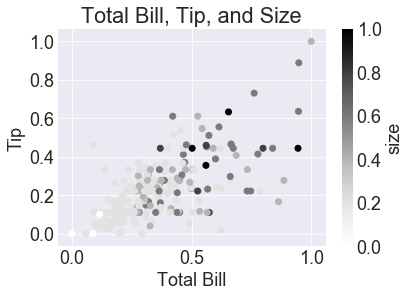

In [28]:
# Normalize Separately
tips_trans.project(['total_bill', 'tip', 'size'])
tips_trans.normalize_separately()
tips_trans.scatter_color('total_bill', 'tip', 'size', 'Total Bill, Tip, and Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
tips_trans.show()

### Credit:
    Mike Zheng
    Qingbo Liu
    Victor Pan
    Zixuan Wang
    https://matplotlib.org/3.1.1/index.html